# Project description


Ask a buyer to describe their dream home and they probably won't start with basement ceiling height or proximity to an east-west rail line. But the data set from this playground contest proves that price negotiations are influenced by much more than the number of bedrooms or a white picket fence.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

This dataset contains 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa. 

**Goal:** It is your job to predict the sales price for each house using everything you have learned so far. If **you use a model not presented in class, you must justify it, explain how it works and describe precisely the role of each of the hyper-parameters**. For each Id in the test set, you must predict the value of the SalePrice variable. 

**Metric:** Predictions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Homework submission**: You must upload a zip archive containing 3 files to``lms.univ-cotedazur.fr`:

* A `pdf` report describing for each of the selected features the treatment performed
* A `jupyter notebook` performing the preprocessing, each step of which is inserted into a sklearn or imblearn pipeline (you must leave traces of notebook executions. The first cell should have the number 1, the second the number 2, etc.)
* A `result.csv` should contain your prediction for each of the properties in tthe test set in the the following format:
<pre>
        Id,SalePrice
        1461,169000.9876
        1462,187724.1233
        1463,175221.1928
        etc.
</pre>

The scale will be as follows:
* 8 points on the quality of the preprocessing and its description from the report 
* 8 points on the quality and correctness of the code contained in the notebook
* 4 points on the quality of the model produced

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

more detail about the features on `data_description.txt`files

## 1. Dataset Observation 

In [266]:
# before start importing required library

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [267]:
# Read train files


df_train = pd.read_csv("train.csv", index_col=0)
print(len(df_train))
df_train.head(3)

1000


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  

[3 rows x 80 columns]

In [268]:
# Read test file
df_test = pd.read_csv("test.csv", index_col=0)
print(len(df_test))
df_test.head(3)

460


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
id                                                                      
1000          20       RL         74.0    10206   Pave   NaN      Reg   
1001          30       RL         60.0     5400   Pave   NaN      Reg   
1002          20       RL         75.0    11957   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
id                                    ...                                     
1000         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
1001         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
1002         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
id                                                                 
1000         NaN       0       7    2009        WD         Normal  
1001         NaN       0       1    2007        WD        Abnorml  
1002         NaN       0       7    2008        WD         Normal  

[3 rows x 79 columns]

In [269]:
#Making a dataframe with ID and prediction SalePrices
output = df_test.index

In [270]:
output

Int64Index([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', name='id', length=460)

In [271]:
#train.insert(0, 'id', range(1, 1 + len(train)))
#train

In [272]:
print('Dimensions of train data:', df_train.shape)
print('Dimensions of test data:', df_test.shape)

Dimensions of train data: (1000, 80)
Dimensions of test data: (460, 79)


 * Here we can see in train data there have 80 variable and test dataset have 79 variable
 * both have same variables only test data set doesn't have SalePrice variable and SalePrice is here act as a terget variable

In [273]:
"""Let's merge the train and test data and inspect the data type"""
merged = pd.concat([df_train, df_test], axis=0, sort=True)
display(merged.dtypes.value_counts())
print('Dimensions of data:', merged.shape)

object     43
int64      33
float64     4
dtype: int64

Dimensions of data: (1460, 80)


In [274]:
merged.head(2)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleType ScreenPorch  Street  \
0           No         706           0  ...       WD           0    Pave   
1           Gd         978           0  ...       WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0             8         856     AllPub          0      2003         2003   
1             6        1262     AllPub        298      1976         1976   

  YrSold  
0   2008  
1   2007  

[2 rows x 80 columns]

In [275]:
merged.columns.values

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolArea', 'P

In [276]:
'''Extracting numerical variables first'''
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
display(num_merged.head(3))
print('\n')
display(num_merged.columns.values)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3         706           0   
1      1262         0          0             3         978           0   
2       920       866          0             3         486           0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  OverallQual  \
0             1             0        150              0  ...            7   
1             0             1        284              0  ...            6   
2             1             0        434              0  ...            7   

   PoolArea  SalePrice  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  \
0         0   208500.0            0             8          856           0   
1         0   181500.0            0             6         1262         298   
2         0   223500.0            0             6          920           0   

   YearBuilt  YearRemodAdd  YrSold  
0       2003          2003    2008  
1       1976          1976    2007  
2       2001          2002    2008  

[3 rows x 37 columns]

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

In [277]:
'''Plot histogram of numerical variables to validate pandas intuition.'''
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (30, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(num_merged, num_merged.columns, 10, 4)

#### After ploting all 37 variables and ovserb them properly, here I can see some variable are categorical and some are numerical. Numerical are two type like continues and discrete. MSSubClass, OverallQual, OverallCond, MoSold, YrSold these variable are categorical sp next step is convert them into object/ categorical variables.

In [278]:
'''Convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.'''
merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')


In [279]:
'''Check out the data type after correction'''
merged.dtypes.value_counts()

object     48
int64      28
float64     4
dtype: int64

# 2 Data pre-processing and Assumption

### 2.1 Correlation Matrix

* I am using Correlation Matrix to know relationship between independent and dependent variable. we will be able to understand 
  which independent variables are have colesed relation with dependent  variable

<AxesSubplot:>

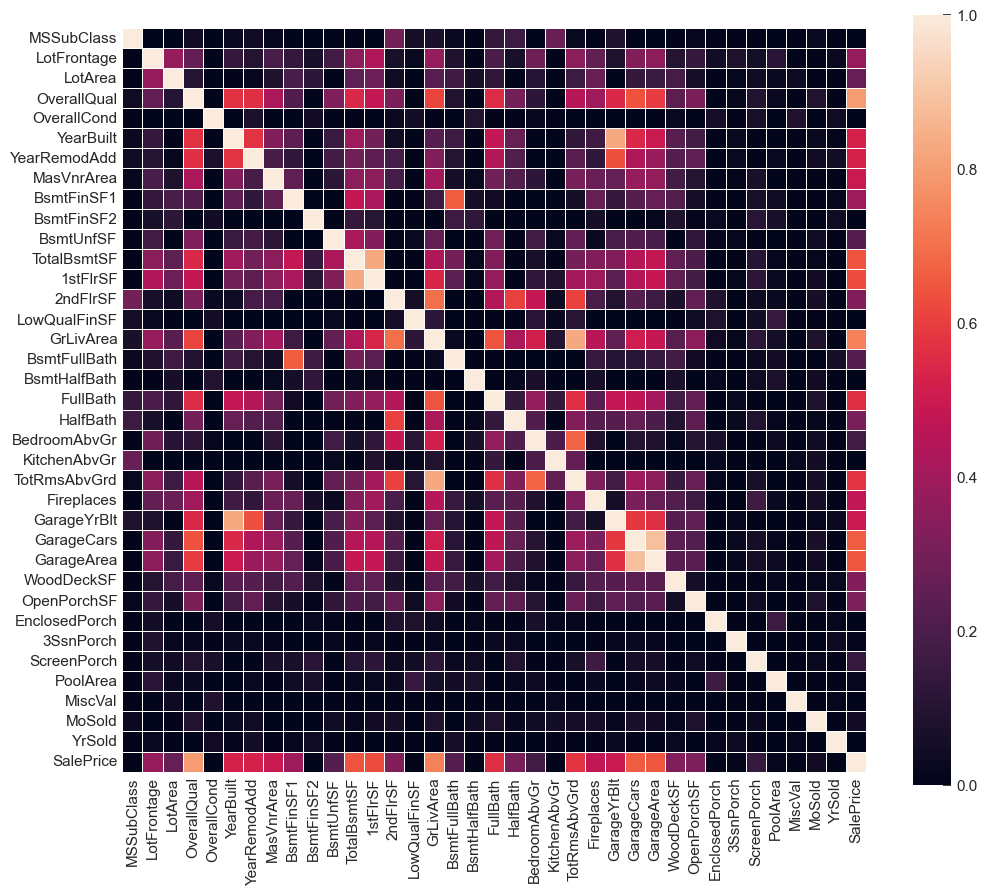

In [280]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

......At the first sight light orange colored squares that get my attention,
showing strong correlation between 'SalePrice' (depended variable) and
'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'TotalBsmtSF',
'1stFlrSF' 'GarageArea' etc( Independed variable)..........

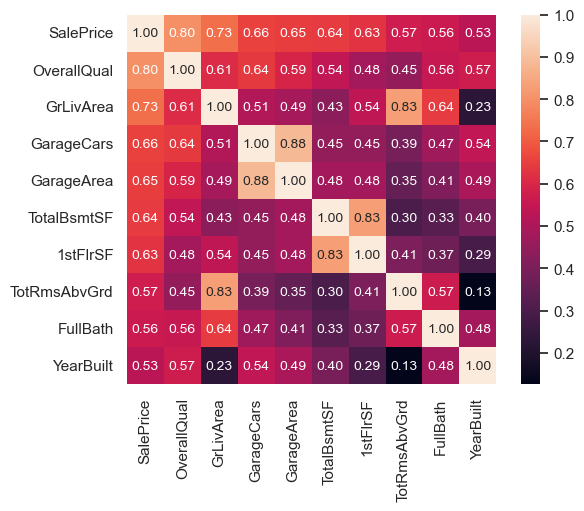

In [281]:
#'SalePrice' correlation matrix
# I am going to find out which varibles are most correlated with 'SalePrice'.


k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* From above diagram we can see 'OverallQual' storngly corelated with 'SalePrice' and then GrlivArea, GarageArea and so on.
* So here I am going to take only six strongest and most impactful variable like 
OverallQual,
GarageCars(GarageCars and GrageArea both are consequences of each ohter),
YearBuilt,
FullBath,
TotalBsmtSF,
GrLivArea.



### 2.2 Linearity and Outliers Treatment 

'''Here I am working with above six variable and try to observe their linearity with SalesPrice'''

In [282]:
'''Function to plot scatter plot'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(x = x,
                        y = y,
                        mode = 'markers',
                        marker = dict(color = y, size=size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode = 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)


'''Sactter plot of GrLivArea vs SalePrice.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [283]:
# Outliers Treatment of GrLivArea
'''Drop observations where GrLivArea is greater than 4000 sq.ft'''
df_train.drop(df_train[df_train.GrLivArea>4000].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

In [284]:
'''Updated Sactter plot of GrLivArea vs SalePrice.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'After Outliers Treatment of GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [285]:
'''Scatter plot of TotalBsmtSF Vs SalePrice'''
scatter_plot(df_train.TotalBsmtSF, df_train.SalePrice, 'TotalBsmtSF Vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

In [286]:
# Outliers treatment of TotalBsmtSF 
'''Drop observations where TotlaBsmtSF is greater than 2500 sq.ft'''
df_train.drop(df_train[df_train.TotalBsmtSF>2500].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)


'''Updated Scatter plot of TotalBsmtSF Vs SalePrice'''
scatter_plot(df_train.TotalBsmtSF, df_train.SalePrice, 'After Outliers Treatment of TotalBsmtSF Vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

In [287]:
'''Scatter plot of YearBuilt Vs SalePrice'''
# I did transform the Saleprice in log transformation for more clear linear relationship.
scatter_plot(df_train.YearBuilt, np.log1p(df_train.SalePrice), 'YearBuilt Vs SalePrice', 'YearBuilt', 'SalePrice', 10, 'viridis')

In [288]:
# Outliers Treatment

'''Drop observations where YearBulit is less than 1893 year'''
df_train.drop(df_train[df_train.YearBuilt<1895].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

'''Scatter plot of YearBuilt Vs SalePrice'''
scatter_plot(df_train.YearBuilt, np.log1p(df_train.SalePrice), 'YearBuilt Vs SalePrice', 'YearBuilt', 'SalePrice', 10, 'viridis')

In [289]:
'''Scatter plot of GarageCars Vs SalePrice'''
scatter_plot(df_train.GarageCars, np.log(df_train.SalePrice), 'GarageCars Vs SalePrice', 'GarageCars', 'SalePrice', 10, 'Electric')

In [290]:


# Outliers Treatment

'''Drop observations where GarageCarst is greater than 3.5 '''
df_train.drop(df_train[df_train.GarageCars>3.5].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

'''Scatter plot of GarageCars Vs SalePrice'''
scatter_plot(df_train.GarageCars, np.log(df_train.SalePrice), 'GarageCars Vs SalePrice', 'GarageCars', 'SalePrice', 10, 'Electric')

In [291]:
'''Scatter plot of OverallQual Vs SalePrice'''
scatter_plot(df_train.OverallQual, np.log(df_train.SalePrice), 'OverallQual Vs SalePrice', 'OverallQual', 'SalePrice', 10, 'Bluered')

#### OverallQual Vs SalePrice shows linear relationship !!!!!!!!

In [292]:
'''Scatter plot of FullBath Vs SalePrice'''
scatter_plot(df_train.FullBath, np.log(df_train.SalePrice), 'FullBath Vs SalePrice', 'FullBath', 'SalePrice', 10, 'RdBu')

##### FullBath Vs SalePrice shows linear relationship that's great !!!!!!!!!!!!!

### 2.3 Working With Missing Variables 

 In this section I work with missing values. There are several way to imput missing values like using Mean, median and mode function. for the numerical variables I used mean imputing if the numerical should be symettric and for categorical variables i used mode imputation.On the other hand, for a variable with skewed distribution and outliers, meadian-imputation is recommended.

In [293]:
'''separate our target variable first'''
y_train = df_train.SalePrice

'''Drop SalePrice from train data.'''
df_train.drop('SalePrice', axis = 1, inplace = True)

'''Now combine train and test data frame together.'''
df_merged = pd.concat([df_train, df_test], axis = 0)

'''Dimensions of new data frame'''
df_merged.shape



(1445, 79)

In [294]:
'''Again convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.'''
df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')
df_merged.dtypes.value_counts()

object     48
int64      28
float64     3
dtype: int64

In [295]:
df_merged.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [296]:
df_merged

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0     8450   Pave   NaN      Reg   
1            20       RL         80.0     9600   Pave   NaN      Reg   
2            60       RL         68.0    11250   Pave   NaN      IR1   
3            70       RL         60.0     9550   Pave   NaN      IR1   
4            60       RL         84.0    14260   Pave   NaN      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455         60       RL         62.0     7917   Pave   NaN      Reg   
1456         20       RL         85.0    13175   Pave   NaN      Reg   
1457         70       RL         66.0     9042   Pave   NaN      Reg   
1458         20       RL         68.0     9717   Pave   NaN      Reg   
1459         20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
2            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
3            Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
4            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
...          ...       ...       ...  ...         ...      ...    ...    ...   
1455         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1456         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1457         Lvl    AllPub    Inside  ...           0        0    NaN  GdPrv   
1458         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1459         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  
0            NaN       0      2   2008        WD         Normal  
1            NaN       0      5   2007        WD         Normal  
2            NaN       0      9   2008        WD         Normal  
3            NaN       0      2   2006        WD        Abnorml  
4            NaN       0     12   2008        WD         Normal  
...          ...     ...    ...    ...       ...            ...  
1455         NaN       0      8   2007        WD         Normal  
1456         NaN       0      2   2010        WD         Normal  
1457        Shed    2500      5   2010        WD         Normal  
1458         NaN       0      4   2010        WD         Normal  
1459         NaN       0      6   2008        WD         Normal  

[1445 rows x 79 columns]

In [297]:
'''columns with missing observation'''
missing_columns = df_merged.columns[df_merged.isnull().any()].values
'''Number of columns with missing obervation'''
total_missing_columns = np.count_nonzero(df_merged.isnull().sum())
print('We have ' , total_missing_columns ,  'features with missing values and those features (with missing values) are: \n\n' , missing_columns)

We have  19 features with missing values and those features (with missing values) are: 

 ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature']


In [298]:
'''Get and plot only the features (with missing values) and their corresponding missing values.'''
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()
missing_columns

LotFrontage      258
Alley           1359
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      37
Electrical         1
FireplaceQu      685
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1438
Fence           1167
MiscFeature     1392
dtype: int64


As we can see there are some variables has most of missing values. like Pool like PoolQC, MiscFeature, Alley, Fence, 
and FirePlaceQu.We can drop them from dataset because if a variable have at least 40% missing value then we usually drop them 
but here we cant because 'NaN' in PoolQC refers to 'No Pool', 'NaN' in MiscFeature refers to 'None', and 'NaN' in Alley
means 'No alley access' etc. So if we drop them then our prediction wont be more effecient.

So here i am going to replace 'NaN' to 'None'.


In [299]:
'''Impute by None where NaN means something.'''
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [300]:
'''These are categorical variables and will be imputed by mode.'''
to_impute_by_mode =  df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [301]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

'LotFrontage' is remain to impute becuase, Almost 17% observations of LotFrontage are missing in. Hence, simply imputing LotFrontage by mean or median might introduce bias since the amount of missing values is significant. Again LotFrontage may differ by different categories of house. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median LotFrontage to impute the missing values of it. This method may result in better accuracy without high bias, unless a missing value is expected to have a very high variance.

In [302]:
'''We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical.'''
df = df_merged.drop(columns=['LotFrontage'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted.

print('Dimensions of train data:', df.shape)
df.head(5)

Dimensions of train data: (1445, 78)


MSSubClass  MSZoning  LotArea  Street  Alley  LotShape  LandContour  \
0           5         3      326       1      1         3            3   
1           0         3      496       1      1         3            3   
2           5         3      699       1      1         0            3   
3           6         3      487       1      1         0            3   
4           5         3      921       1      1         0            3   

   Utilities  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0          0          4          0  ...            0         0       3      4   
1          0          2          0  ...            0         0       3      4   
2          0          4          0  ...            0         0       3      4   
3          0          0          0  ...            0         0       3      4   
4          0          2          0  ...            0         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            1        0       1       2         8              4  
1            1        0       4       1         8              4  
2            1        0       8       2         8              4  
3            1        0       1       0         8              0  
4            1        0      11       2         8              4  

[5 rows x 78 columns]

In [303]:
 # Inserting LotFrontage in variable correlation.
df['LotFrontage'] = df_merged['LotFrontage']
# Move LotFrontage at index 0.
df = df.set_index('LotFrontage').reset_index()
df.head(5)

LotFrontage  MSSubClass  MSZoning  LotArea  Street  Alley  LotShape  \
0         65.0           5         3      326       1      1         3   
1         80.0           0         3      496       1      1         3   
2         68.0           5         3      699       1      1         0   
3         60.0           6         3      487       1      1         0   
4         84.0           5         3      921       1      1         0   

   LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0            3          0          4  ...            0         0       3   
1            3          0          2  ...            0         0       3   
2            3          0          4  ...            0         0       3   
3            3          0          0  ...            0         0       3   
4            3          0          2  ...            0         0       3   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0      4            1        0       1       2         8              4  
1      4            1        0       4       1         8              4  
2      4            1        0       8       2         8              4  
3      4            1        0       1       0         8              0  
4      4            1        0      11       2         8              4  

[5 rows x 79 columns]

In [304]:
'''correlation of df'''
corr = df.corr()
display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage     1.000000
LotArea         0.609794
1stFlrSF        0.388533
TotRmsAbvGrd    0.345576
GrLivArea       0.344469
Name: LotFrontage, dtype: float64

LotConfig    -0.208354
GarageType   -0.276982
MSSubClass   -0.342323
BldgType     -0.449906
Utilities          NaN
Name: LotFrontage, dtype: float64

 * As we can see Only 'BldgType' categorical variable has the highest correlation with LotFrontage

In [305]:
'''Impute LotFrontage with median of respective columns (i.e., BldgType)'''
df_merged['LotFrontage'] = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

'''Is there any missing values left untreated??'''
print('Missing variables left untreated: ', df_merged.columns[df_merged.isna().any()].values)

Missing variables left untreated:  []


### 2.4 Transformation of Distributions 

In this section, I am going to apply skewed distribution whether most of the variables are already positively skewed but i will apply log transformation on them. 
* The data are perfectly symmetrical if skewness value is 0.
* the data distrubution is highly skewed if skewness valu is less than -1 or greater than 1
* the data distribution is moderately skewed if skewness value is between -1 and -0.5 or between 0.5 to 1
* the distrubution is approximately symmetric if skewness is between -0.5 to 0.5


In [306]:
'''Skewness and Kurtosis of SalePrice'''
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: 1.458615
Kurtosis: 3.229842


In [307]:
'''Function to plot histogram'''
def histogram_plot(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Plot the distribution of SalePrice with skewness.'''
histogram_plot(y_train, 'SalePrice without Transformation', 'Abs Frequency', 'deepskyblue')

In [308]:
'''Plot the distribution of SalePrice with skewness'''
y_train = np.log1p(y_train)
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_train.skew())
histogram_plot(y_train, title, 'Abs Frequency', ' darksalmon')

In [309]:
'''Now calculate the rest of the explanetory variables'''
skew_num = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])
skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted

Skewness
MiscVal        24.369297
PoolArea       14.751118
LotArea        12.307124
3SsnPorch      10.249950
LowQualFinSF    9.206824
KitchenAbvGr    4.502159
BsmtFinSF2      4.282285
BsmtHalfBath    4.110716
ScreenPorch     4.102266
EnclosedPorch   3.098630
MasVnrArea      2.645656
LotFrontage     2.300135
OpenPorchSF     2.235133
BsmtFinSF1      1.699685
WoodDeckSF      1.548369
TotalBsmtSF     1.385431
1stFlrSF        1.273244
GrLivArea       1.187877
BsmtUnfSF       0.929395
2ndFlrSF        0.787889
HalfBath        0.681731
TotRmsAbvGrd    0.673199
Fireplaces      0.653794
BsmtFullBath    0.584965
BedroomAbvGr    0.215505
GarageArea      0.181986
FullBath       -0.000780
GarageCars     -0.377477
YearRemodAdd   -0.489372
YearBuilt      -0.556353
GarageYrBlt    -0.676471

In [310]:
'''Function to plot bar chart'''
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(x = x,
                   y = y,
                   marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)


''' plot the skewness for rest of the explanetory variables'''
bar_plot(skew_num_sorted.index, skew_num_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Blackbody')

In [311]:
'''Extract numeric variables merged data.'''
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [312]:
'''Make the tranformation of the explanetory variables'''
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew() > 0.5].index])


#Normal variables
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew() < 0.5].index]
    
#Merging
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [313]:
'''Update numerical variables with transformed variables.'''
df_merged_num.update(df_merged_num_all)

## 3. Feature Engineering

### 3.1 Feature Scaling

Feature scaling can be an important part for many machine learning algorithms. It’s a step of data pre-processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.
In the following, three of the most important scaling methods are presented:

Standard Scaler
Min-Max Scaler
Robust Scaler

Feature scaling helps gradient descent converge faster, thus reducing training time. Its not necessary to standarize the target variable. However, due to the presence of outliers, we would use sklearn's RobustScaler since it is not affected by outliers.

In [314]:
'''Standarize numeric features with RobustScaler'''
from sklearn.preprocessing import RobustScaler

'''Creating scaler object.'''
scaler = RobustScaler()

'''Fit scaler object on train data.'''
scaler.fit(df_merged_num)

'''Apply scaler object to both train and test data.'''
df_merged_num_scaled = scaler.transform(df_merged_num)

'''Retrive column names'''
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)
# Pass the index of index df_merged_num, otherwise it will sum up the index.


## 3.2 Encoding Categorical Variables 

####  Manually Label Encoding 

Here is some benefit to encode the data manually like, if i use sklearn's label encoder to encode some categorical variables to preserve their ordinality then there have a chance to lost ordinality. thats why I try to do it manually using pandas replace method to encode.


In [315]:
"""Let's extract categorical variables first and convert them into category."""
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')


In [316]:
# lets see all variable with category type and set them into interger value 1,2,3 etc
df_merged_cat 

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave  None      Reg         Lvl    AllPub   
1            20       RL   Pave  None      Reg         Lvl    AllPub   
2            60       RL   Pave  None      IR1         Lvl    AllPub   
3            70       RL   Pave  None      IR1         Lvl    AllPub   
4            60       RL   Pave  None      IR1         Lvl    AllPub   
...         ...      ...    ...   ...      ...         ...       ...   
1455         60       RL   Pave  None      Reg         Lvl    AllPub   
1456         20       RL   Pave  None      Reg         Lvl    AllPub   
1457         70       RL   Pave  None      Reg         Lvl    AllPub   
1458         20       RL   Pave  None      Reg         Lvl    AllPub   
1459         20       RL   Pave  None      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive  \
0       Inside       Gtl      CollgCr  ...         TA         TA          Y   
1          FR2       Gtl      Veenker  ...         TA         TA          Y   
2       Inside       Gtl      CollgCr  ...         TA         TA          Y   
3       Corner       Gtl      Crawfor  ...         TA         TA          Y   
4          FR2       Gtl      NoRidge  ...         TA         TA          Y   
...        ...       ...          ...  ...        ...        ...        ...   
1455    Inside       Gtl      Gilbert  ...         TA         TA          Y   
1456    Inside       Gtl       NWAmes  ...         TA         TA          Y   
1457    Inside       Gtl      Crawfor  ...         TA         TA          Y   
1458    Inside       Gtl        NAmes  ...         TA         TA          Y   
1459    Inside       Gtl      Edwards  ...         TA         TA          Y   

     PoolQC  Fence MiscFeature MoSold YrSold SaleType SaleCondition  
0      None   None        None      2   2008       WD        Normal  
1      None   None        None      5   2007       WD        Normal  
2      None   None        None      9   2008       WD        Normal  
3      None   None        None      2   2006       WD       Abnorml  
4      None   None        None     12   2008       WD        Normal  
...     ...    ...         ...    ...    ...      ...           ...  
1455   None   None        None      8   2007       WD        Normal  
1456   None  MnPrv        None      2   2010       WD        Normal  
1457   None  GdPrv        Shed      5   2010       WD        Normal  
1458   None   None        None      4   2010       WD        Normal  
1459   None   None        None      6   2008       WD        Normal  

[1445 rows x 48 columns]

In [317]:


"""let's begin the tedious process of label encoding of ordinal variable"""
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [318]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Extract label encoded variables'''
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

In [319]:
df_merged_cat.head(3)

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None        3           3         1    Inside   
1         20       RL   Pave  None        3           3         1       FR2   
2         60       RL   Pave  None        2           3         1    Inside   

  LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive PoolQC  Fence  \
0         2      CollgCr  ...          3          3          2      0      0   
1         2      Veenker  ...          3          3          2      0      0   
2         2      CollgCr  ...          3          3          2      0      0   

   MiscFeature MoSold YrSold SaleType SaleCondition  
0         None      2   2008       WD        Normal  
1         None      5   2007       WD        Normal  
2         None      9   2008       WD        Normal  

[3 rows x 48 columns]

#### One Hot Encoding 
After mapped all categorical values to integer values then I am going to apply another encoding named one hot encoding which will help me representation of categorical variables as binary vectors.

Pandas offers a convenient function called get_dummies to get one-hot encodings.Categorical variables without any inherent order will be converted into numerical for our model using pandas get_dummies method.

In [320]:
'''Now selecting the nominal vaiables for one hot encording'''
df_merged_one_hot = df_merged_cat.select_dtypes(include=['category'])

"""Let's get the dummies variable"""
df_merged_one_hot = pd.get_dummies(df_merged_one_hot, drop_first=True)

"""Let's concat one hot encoded and label encoded variable together"""
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis=1)

'''Finally join processed categorical and numerical variables'''
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis=1)

'''Dimensions of new data frame'''
df_merged_processed.shape
# here after one hot encode we got 284 columns, every categorical value convert to column

(1445, 284)

In [321]:
'''Now retrive train and test data for modelling.'''
df_train_final = df_merged_processed.iloc[0:985, :]
df_test_final = df_merged_processed.iloc[985:, :]

'''And we have our target variable as y_train.'''
y_train = y_train

In [322]:
'''Updated train data'''
df_train_final.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0    -0.320894 -0.260784   0.652174      0.263158    1.034716    0.092636   
1     0.434379  0.036157   0.065217     -0.447368    0.000000    0.142247   
2    -0.156958  0.405266   0.608696      0.236842    0.997612    0.035821   
3    -0.611435  0.024005  -1.260870     -0.605263    0.000000   -0.087387   
4     0.612146  0.957037   0.586957      0.184211    1.147836    0.081225   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_New  \
0         0.0  -0.883100    -0.298988 -0.518187  ...             0   
1         0.0  -0.389988     0.499143  0.340410  ...             0   
2         0.0  -0.061725    -0.150762 -0.358731  ...             0   
3         0.0   0.107565    -0.554341 -0.262303  ...             0   
4         0.0   0.032283     0.299074  0.125184  ...             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      0   
4                     0                     1                      0   

   OverallQual  OverallCond  
0            7            5  
1            6            8  
2            7            5  
3            7            5  
4            8            5  

[5 rows x 284 columns]

In [323]:
'''Updated test data'''
df_test_final.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
1000     0.150550  0.178612  -0.456522     -1.078947    0.000000   -0.907364   
1001    -0.611435 -1.302783  -1.152174     -1.131579    0.000000   -0.907364   
1002     0.199398  0.547109   0.717391      0.342105    0.781243   -0.416759   
1003    -0.051581  0.456416   0.065217     -0.447368    1.000000   -0.907364   
1004    -1.816233 -2.533442   0.695652      0.342105    0.554885   -0.475540   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_New  \
1000         0.0  -4.778005   -14.197974 -0.301777  ...             0   
1001         0.0   0.298664    -0.739108 -0.991651  ...             0   
1002         0.0   0.925190     0.953491  0.829180  ...             0   
1003         0.0   0.987673     1.087540  0.973384  ...             0   
1004         0.0   0.806440     0.631661  0.728527  ...             0   

      SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
1000             0            1                      0                     0   
1001             0            1                      0                     0   
1002             0            1                      0                     0   
1003             0            1                      0                     0   
1004             0            1                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
1000                     0                     1                      0   
1001                     0                     0                      0   
1002                     0                     1                      0   
1003                     0                     1                      0   
1004                     0                     1                      0   

      OverallQual  OverallCond  
1000            3            3  
1001            5            6  
1002            8            5  
1003            5            6  
1004            7            5  

[5 rows x 284 columns]

In [324]:
df_test_final.shape

(460, 284)

## 4. Model Building and Evaluation 
With all the preprocessings done and dusted, we're ready to train our regression models with the processed data.

 ### 4.1 Model Traing & R_squard value

#### Model Training

In [325]:
'''set a seed for reproducibility'''
seed = 44

''' here i am going to work with RandomForestRegressor, LinearRegressor and SVR '''
''''We are initialized with default parameters except random_state and n_jobs.'''
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

svr = SVR()
rf = RandomForestRegressor(n_jobs = -1, random_state = seed)
lr = LinearRegression(n_jobs = -1)


In [326]:
"""Let's have a final look at data dimension"""
print('Input matrix dimension:', df_train_final.shape)
print('Output vector dimension:', y_train.shape)
print('Test data dimension:', df_test_final.shape)

Input matrix dimension: (985, 284)
Output vector dimension: (985,)
Test data dimension: (460, 284)


#### R_squard value
 let see how well the model is blend and how well the output value is explained by the determining(independent) variables of the dataset.

In [327]:
'''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
def train_r2(model):
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

'''Calculate and plot the training accuracy.'''
models = [svr, rf,lr]
training_score = []
for model in models:
    training_score.append(train_r2(model))

'''Plot dataframe of training accuracy.'''
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['SVR', 'RF','LR']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models', '% Training Score', 30, 'Rainbow')

 here we can see SVR r-squard value almost 95%, RF 98% and LR 91. according to the r square value SVR and RF is best model.But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. Because training data is something our model has been trained with, i.e., data our model has already seen it. We all know that, the purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.

### 4.2 Model Evaluation & RMSE

Now i am trying to evaluate my model. to evaluate a model's performance we can do is to split the train set in two groups, usually in 70:30 ratio Then we can compare our model prediction.That's how we can tell how our model would perform on unseen data. This is the first model evaluation technique. In sklearn we have a train_test_split method for that. Let's evaluate our model using train_test_split method. After that i will show RMSE value of all 3 models.

In [328]:
'''Evaluate model on the hold set'''
def train_test_split(model):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse) #non-negative square-root
    return rmse

'''Calculate train_test_split score of differnt models and plot them.'''
models = [svr,rf,lr]

train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split(model))
    
'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['SVR','RF','LR']
scatter_plot(train_test_score.index, train_test_score['Train_Test_RMSE'], "Models' Test Score (RMSE) on Holdout(30%) Set", 'Models', 'RMSE', 30, 'plotly3')

The value of mean squared error, smaller is better.as we can see SVR and RF has less RMSE score and remember that SVR and RF both R-squared value was higher then LR. So I dicided to predict with SVR.

### 4.3 K-Fold cross validation

However, train_test split has its drawbacks. Because this approach introduces bias as we are not using all of our observations for testing and also we're reducing the train data size. To overcome this we can use a technique called cross validation where all the data is used for training and testing periodically. Thus we may reduce the bias introduced by train_test_split. From different cross validation methods, we would use k-fold cross validation. In sklearn we have a method cross_val_score for calculating k-fold cross validation score.

In [329]:
'''Function to compute cross validation scores.'''
def cross_validation(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, df_train_final, y_train, cv=10, n_jobs= -1, scoring = 'neg_mean_squared_error')
    sq_val_score = np.sqrt(-1*val_score)
    r_val_score = np.round(sq_val_score, 5)
    return r_val_score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [lr, svr, rf]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validation(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns=['Cross_Val_Score(RMSE)'])
x_val_score.index = ['LR','SVR','RF']
scatter_plot(x_val_score.index, x_val_score['Cross_Val_Score(RMSE)'], "Models' 10-fold Cross Validation Scores (RMSE)", 'Models', 'RMSE', 30, 'cividis')

From above diagram we can conclude that SVR is the best reggesor model than RF and LR for this example.

## 4.4 Optimization of Hyperparameters 

Let's start optimizing Hyperparameters of the models.

For optimization we used Grid Search to the models with the hopes of optimizing their hyperparameters and thus improving their accuracy. 

In [330]:
'''Create a function to tune hyperparameters of the selected models.'''
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score #if you want to know best parametes and best score
    
    '''Construct grid search object with 10 fold cross validation.'''
    grid = GridSearchCV(model, param_grid, cv = 10, verbose = 1, scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid.fit(df_train_final, y_train)
    best_params = grid.best_params_ 
    best_score = np.round(np.sqrt(-1 * grid.best_score_), 5)
    return best_params, best_score

#### Optimize Support Vector Regression


In [331]:
svr_params_grid = {'kernel':['linear', 'poly', 'rbf'],
                   'C':[2,4,5],
                   'gamma':[0.01,0.001,0.0001]}
tune_hyperparameters(svr, svr_params_grid)
svr_best_params, svr_best_score = best_params, best_score
print('SVR best params:{} & best_score:{:0.5f}' .format(svr_best_params, svr_best_score))

Fitting 10 folds for each of 27 candidates, totalling 270 fits
SVR best params:{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11910


In [332]:
rf_params_grid = {'n_estimators':[1,5,50,100],
                   'max_depth':[1,2],
                   'min_samples_split':[3,4],
                   'min_samples_leaf':[2,4],
                   'random_state':[seed]}
tune_hyperparameters(rf, rf_params_grid)
rf_best_params, rf_best_score = best_params, best_score
print('RF best params:{} & best_score:{:0.5f}' .format(rf_best_params, rf_best_score))

Fitting 10 folds for each of 32 candidates, totalling 320 fits
RF best params:{'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 44} & best_score:0.23368


## 4.5 Retrain and Predict Using Best Hyperparameters

Now i would like to retrain our models using the best parameters responsible for best rmse after optimization. Then we would predict on test data to see how models perform on leaderboard !!!!!

In [333]:
'''Initialize the models with best hyperparameters'''

#rf_opt = RandomForestRegressor(**rf_best_params)
svm_opt = SVR(**svr_best_params)



In [334]:
def predict_with_optimized_models(model):
    model.fit(df_train_final, y_train)
    y_pred = np.expm1(model.predict(df_test_final))
    submission = pd.DataFrame()
    submission['ID']=df_test.index
    submission['SalePrice'] = y_pred
    return submission

#predict_with_optimized_models(rf_opt).to_csv('results_rf.csv', index = False)
predict_with_optimized_models(svm_opt).to_csv('results.csv', index = False)

In [335]:
df = pd.read_csv("results.csv")
df

ID      SalePrice
0    1000   77906.891058
1    1001   79482.742103
2    1002  254264.156429
3    1003  160520.087669
4    1004  198404.016351
..    ...            ...
455  1455  181824.561434
456  1456  208781.757871
457  1457  219119.282177
458  1458  133532.250711
459  1459  146728.873446

[460 rows x 2 columns]

In [336]:
#df = pd.read_csv("results_rf.csv")
#df

In [337]:
pip install pyppeteer

Note: you may need to restart the kernel to use updated packages.
